In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

##### Read data from file.

In [2]:
first_sea_df = pd.read_csv("epa-sea-level.csv")
first_x = first_sea_df["Year"]
first_y = first_sea_df["CSIRO Adjusted Sea Level"]

first_sea_df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


##### Create scatter plot with the first and second lines of best fit.

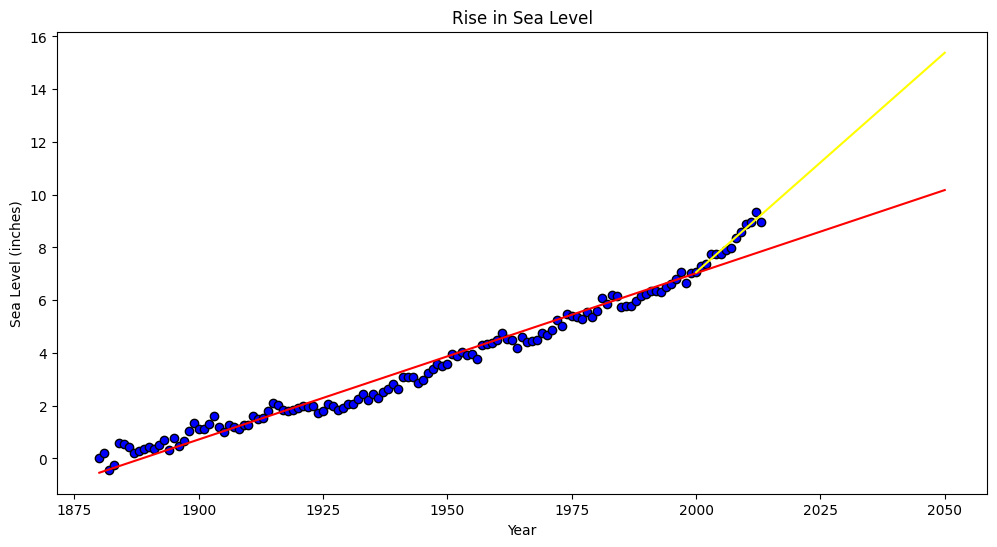

In [3]:
figure, axes = plt.subplots(figsize=(12, 6))
plt.scatter(
    first_x,
    first_y,
    edgecolors="black",
    color="blue"
)

first_result = linregress(first_x, first_y)
first_x_prediction = pd.Series([year for year in range(1880, 2051)])
first_y_prediction = first_result.slope * first_x_prediction + first_result.intercept

plt.plot(
    first_x_prediction,
    first_y_prediction,
    color="r",
)

second_sea_df = first_sea_df.loc[first_sea_df["Year"] >= 2000]
second_x = second_sea_df["Year"]
second_y = second_sea_df["CSIRO Adjusted Sea Level"]
second_result = linregress(second_x, second_y)
second_x_prediction = pd.Series([year for year in range(2000, 2051)])
second_y_prediction = second_result.slope * second_x_prediction + second_result.intercept

plt.plot(
    second_x_prediction,
    second_y_prediction,
    color="yellow",
)

axes.set(
    xlabel="Year",
    ylabel="Sea Level (inches)",
    title="Rise in Sea Level",
)

plt.show()